<a href="https://colab.research.google.com/github/kanjamwingirwa/KPMG_AU_Virtual_Internship/blob/kanja/KPMG_AU_INTERNSHIP_FINAL_PY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#lets load the libraries we require
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import plotly.express as px
import warnings
warnings. filterwarnings("ignore")
sns.set_theme()

In [51]:
#lets read the datasets. In this case, we will read a spreadsheet at a time since it has many sheets within the same file
transactions_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name='Transactions')
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0


In [52]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [67]:
Customer_Demographic_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name='CustomerDemographic')
Customer_Demographic_df.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0


In [68]:
Customer_Demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

# **Data Cleaning - Transactions Table**

In [54]:
#separate the date into year, month, day for exploration purposes
transactions_df['Year'] = transactions_df['transaction_date'].dt.year
transactions_df['Month'] = transactions_df['transaction_date'].dt.month
transactions_df['Day']  = transactions_df['transaction_date'].dt.day

In [55]:
#lets check whether the changes have been implemented
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,2,25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,5,21


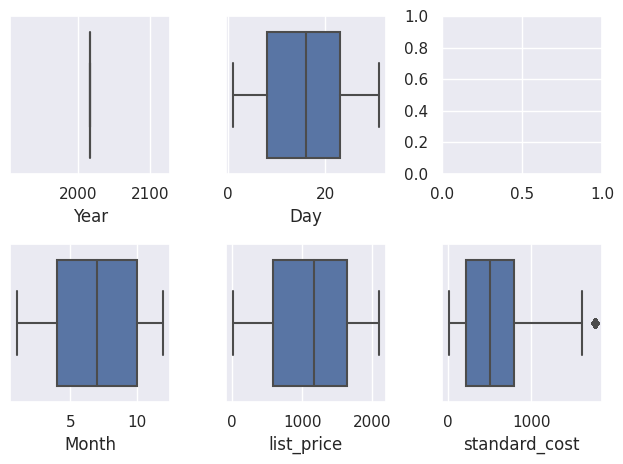

In [56]:
#lets look for outliers
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3)

#create boxplot in each subplot
sns.boxplot(x=transactions_df['Year'], ax=axes[0,0])

sns.boxplot(x=transactions_df['Day'], ax=axes[0,1])

sns.boxplot(x=transactions_df ['Month'], ax=axes[1,0])
sns.boxplot(x=transactions_df['list_price'], ax=axes[1,1])
sns.boxplot(x=transactions_df['standard_cost'], ax=axes[1,2])

plt.tight_layout()

There is an outlier in standard cost

In [57]:
#lets remove the outlier
# Calculate the upper and lower limits
Q1 = transactions_df['standard_cost'].quantile(0.25)
Q3 = transactions_df['standard_cost'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(transactions_df['standard_cost']>=upper)[0]
lower_array = np.where(transactions_df['standard_cost']<=lower)[0]

# Removing the outliers
transactions_df.drop(index=upper_array, inplace=True)
transactions_df.drop(index=lower_array, inplace=True)

In [58]:
#lets check if the chenge has been implemented
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19805 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19805 non-null  int64         
 1   product_id               19805 non-null  int64         
 2   customer_id              19805 non-null  int64         
 3   transaction_date         19805 non-null  datetime64[ns]
 4   online_order             19451 non-null  float64       
 5   order_status             19805 non-null  object        
 6   brand                    19608 non-null  object        
 7   product_line             19608 non-null  object        
 8   product_class            19608 non-null  object        
 9   product_size             19608 non-null  object        
 10  list_price               19805 non-null  float64       
 11  standard_cost            19608 non-null  float64       
 12  product_first_sold_date  19608 n

In [59]:
#lets drop all null values
transactions_df =transactions_df.dropna()

In [60]:
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,2,25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,5,21


# **Feature Engineering - Transactions Table**

In [61]:
#Change the values in the column day of week to actual days for the data to make more sense
transactions_df['Month'].replace({1: 'January', 2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7:'July'}, inplace=True)

# print Data frame after replacing the values
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21


In [62]:
#Change the values in the column day of week to actual days for the data to make more sense
transactions_df['Month'].replace({7: 'July', 8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'}, inplace=True)

# print Data frame after replacing the values
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21


In [63]:
#lets change day into actual name of the day in the week
transactions_df['Day_of_Week'] = transactions_df['transaction_date'].dt.day_name()
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day,Day_of_Week
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25,Saturday
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21,Sunday


In [64]:
#Replace online order column for it to make more sense
transactions_df['online_order'].replace({0.0: 'Not Online', 1.0: 'Online'}, inplace=True)

# print Data frame after replacing the values
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day,Day_of_Week
0,1,2,2950,2017-02-25,Not Online,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25,Saturday
1,2,3,3120,2017-05-21,Online,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21,Sunday


In [94]:
#introduce a 'profit margin column'
transactions_df["Profit Margin"] =  transactions_df["list_price"]-transactions_df["standard_cost"]
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day,Day_of_Week,Profit Margin
0,1,2,2950,2017-02-25,Not Online,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25,Saturday,17.87
1,2,3,3120,2017-05-21,Online,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21,Sunday,1702.55


# **Data Cleaning - Customer Demographic Table**

In [69]:
Customer_Demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [70]:
#lets delete the 'default' column
Customer_Demographic_df = Customer_Demographic_df.drop(['default'], axis =1)
Customer_Demographic_df.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0


In [71]:
# to break down DOB into yr, month, day strictly for analysis
Customer_Demographic_df['Year'] = Customer_Demographic_df['DOB'].dt.year
Customer_Demographic_df['Month'] = Customer_Demographic_df['DOB'].dt.month
Customer_Demographic_df['Day']  = Customer_Demographic_df['DOB'].dt.day

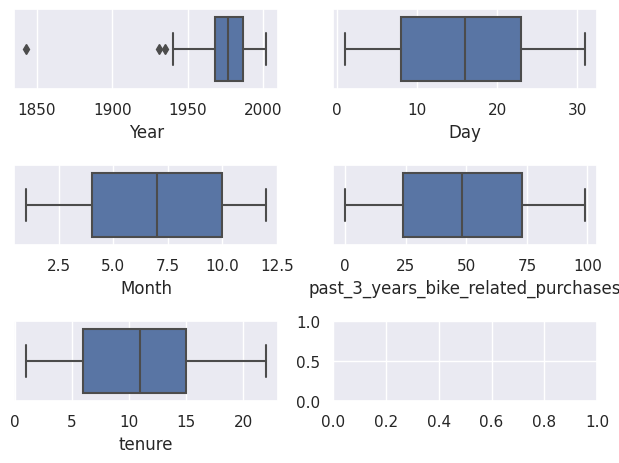

In [72]:
#let's look for outliers
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 3 columns)
fig, axes = plt.subplots(3, 2)

#create boxplot in each subplot
sns.boxplot(x=Customer_Demographic_df['Year'], ax=axes[0,0])
sns.boxplot(x=Customer_Demographic_df['Day'], ax=axes[0,1])
sns.boxplot(x=Customer_Demographic_df['Month'], ax=axes[1,0])
sns.boxplot(x=Customer_Demographic_df['past_3_years_bike_related_purchases'], ax=axes[1,1])
sns.boxplot(x=Customer_Demographic_df['tenure'], ax=axes[2,0])

plt.tight_layout()

Somebody was born in 1850, obviously that's a typo

In [73]:
#lets deal with outliers
# Calculate the upper and lower limits
Q1 = Customer_Demographic_df['Year'].quantile(0.25)
Q3 = Customer_Demographic_df['Year'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(Customer_Demographic_df['Year']>=upper)[0]
lower_array = np.where(Customer_Demographic_df['Year']<=lower)[0]

# Removing the outliers
Customer_Demographic_df.drop(index=upper_array, inplace=True)
Customer_Demographic_df.drop(index=lower_array, inplace=True)

In [74]:
#lets check if the outliers have been removed successfuly
Customer_Demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3997 non-null   int64         
 1   first_name                           3997 non-null   object        
 2   last_name                            3872 non-null   object        
 3   gender                               3997 non-null   object        
 4   past_3_years_bike_related_purchases  3997 non-null   int64         
 5   DOB                                  3910 non-null   datetime64[ns]
 6   job_title                            3491 non-null   object        
 7   job_industry_category                3341 non-null   object        
 8   wealth_segment                       3997 non-null   object        
 9   deceased_indicator                   3997 non-null   object        
 10  owns_car    

In [75]:
these_ones =Customer_Demographic_df[['gender', 'job_title', 'wealth_segment', 'job_industry_category', 'deceased_indicator', 'owns_car', 'tenure']]
for column in these_ones:
     print("\n" + column)
     print(Customer_Demographic_df[column].value_counts())


gender
Female    2036
Male      1871
U           87
F            1
Femal        1
M            1
Name: gender, dtype: int64

job_title
Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      40
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

wealth_segment
Mass Customer        1999
High Net Worth       1021
Affluent Customer     977
Name: wealth_segment, dtype: int64

job_industry_category
Manufacturing         799
Financial Services    774
Health                602
Retail                356
Property              267
IT                    222
Entertainment         136
Argiculture   

There are some misspellings that we need to correct in the gender column

In [76]:
Customer_Demographic_df['gender'].replace({'F': 'Female', 'Femal': 'Female', 'M': 'Male'}, inplace=True)
Customer_Demographic_df.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Year,Month,Day
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953.0,10.0,12.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980.0,12.0,16.0


In [77]:
#lets drop the last name column as it has too many null and is quite irrelevant anyway
for col in Customer_Demographic_df.columns:
    if 'last_name' in col:
        del Customer_Demographic_df[col]

Customer_Demographic_df.head(5)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Year,Month,Day
0,1,Laraine,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953.0,10.0,12.0
1,2,Eli,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980.0,12.0,16.0
2,3,Arlin,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954.0,1.0,20.0
3,4,Talbot,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1961.0,10.0,3.0
4,5,Sheila-kathryn,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,1977.0,5.0,13.0


In [78]:
Customer_Demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3997 non-null   int64         
 1   first_name                           3997 non-null   object        
 2   gender                               3997 non-null   object        
 3   past_3_years_bike_related_purchases  3997 non-null   int64         
 4   DOB                                  3910 non-null   datetime64[ns]
 5   job_title                            3491 non-null   object        
 6   job_industry_category                3341 non-null   object        
 7   wealth_segment                       3997 non-null   object        
 8   deceased_indicator                   3997 non-null   object        
 9   owns_car                             3997 non-null   object        
 10  tenure      

In [79]:
Customer_Demographic_df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,Year,Month,Day
count,3997.000000,3997.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,2001.539655,48.881161,10.657289,1977.087468,6.520205,15.759847
std,1154.591793,28.723687,5.659132,12.580954,3.462399,8.781004
min,1.000000,0.000000,1.000000,1940.000000,1.000000,1.000000
25%,1002.000000,24.000000,6.000000,1968.000000,4.000000,8.000000
50%,2002.000000,48.000000,11.000000,1977.000000,7.000000,16.000000
75%,3001.000000,73.000000,15.000000,1987.000000,10.000000,23.000000
max,4000.000000,99.000000,22.000000,2002.000000,12.000000,31.000000


We shall introduce a new column 'Age' in the dataset then do away with Yr, Month, Day

In [80]:
Customer_Demographic_df["Age"] = 2017 - Customer_Demographic_df["Year"]
Customer_Demographic_df.head(2)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Year,Month,Day,Age
0,1,Laraine,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953.0,10.0,12.0,64.0
1,2,Eli,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980.0,12.0,16.0,37.0


In [81]:
#Lets drop Year, month, and day
Customer_Demographic_df = Customer_Demographic_df.drop(['Year', 'Month', 'Day'], axis =1)
Customer_Demographic_df.head(2)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,64.0
1,2,Eli,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,37.0


In [82]:
Customer_Demographic_df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,Age
count,3997.000000,3997.000000,3910.000000,3910.000000
mean,2001.539655,48.881161,10.657289,39.912532
std,1154.591793,28.723687,5.659132,12.580954
min,1.000000,0.000000,1.000000,15.000000
25%,1002.000000,24.000000,6.000000,30.000000
50%,2002.000000,48.000000,11.000000,40.000000
75%,3001.000000,73.000000,15.000000,49.000000
max,4000.000000,99.000000,22.000000,77.000000


Let's fill the null values with means

In [83]:
#fill the age column with 39 which is the mean
Customer_Demographic_df['Age'].fillna(value=39, inplace=True)

In [84]:
#fill the tenure column with 10 which is the mean
Customer_Demographic_df['tenure'].fillna(value=10, inplace=True)

In [85]:
#fill the job_industry_category column with 'manufacturing' which is the mean
Customer_Demographic_df['job_industry_category'].fillna(value='manufacturing', inplace=True)

In [86]:
#lets check to see if the changes have been implemented
Customer_Demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3997 non-null   int64         
 1   first_name                           3997 non-null   object        
 2   gender                               3997 non-null   object        
 3   past_3_years_bike_related_purchases  3997 non-null   int64         
 4   DOB                                  3910 non-null   datetime64[ns]
 5   job_title                            3491 non-null   object        
 6   job_industry_category                3997 non-null   object        
 7   wealth_segment                       3997 non-null   object        
 8   deceased_indicator                   3997 non-null   object        
 9   owns_car                             3997 non-null   object        
 10  tenure      

Just do away with job_title and work with industries

In [87]:
for col in Customer_Demographic_df.columns:
    if 'job_title' in col:
        del Customer_Demographic_df[col]

Customer_Demographic_df.head(2)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Female,93,1953-10-12,Health,Mass Customer,N,Yes,11.0,64.0
1,2,Eli,Male,81,1980-12-16,Financial Services,Mass Customer,N,Yes,16.0,37.0


In [88]:
Customer_df =Customer_Demographic_df.copy()

In [95]:
transcation_df = transactions_df.copy()

In [96]:
transcation_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day,Day_of_Week,Profit Margin
0,1,2,2950,2017-02-25,Not Online,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25,Saturday,17.87
1,2,3,3120,2017-05-21,Online,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21,Sunday,1702.55
